In [1]:
#Imports
import numpy as np
import pandas as pd

#Settings for string legibility
pd.set_option('display.max_rows', 500)
pd.set_option("display.max_colwidth", -1)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#String manipulations
import re

#Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline
plt.rcParams['figure.figsize'] = [20,16]
plt.rcParams['figure.dpi'] = 300
%config InlineBackend.figure_format = 'svg'
sns.set_style("whitegrid")

#Wordcloud
from wordcloud import WordCloud
from nltk.corpus import stopwords

#Quality of life
import warnings
warnings.filterwarnings('ignore')

/var/folders/_r/ryq2zqs914vb11q08_c9klqc0000gn/T/ipykernel_60862/1278245018.py:7: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


In [2]:
df = pd.read_csv('Booking_Jobs.csv')

In [3]:
print('Dataframe shape: ', df.shape)
df.head()

Dataframe shape:  (108, 2)


Job Title  \
0  Data Engineer                                                        
1  Manager Data Science Insights - Content Agency                       
2  Senior Data Engineering Manager - Data & Machine Learning Platform   
3  Senior Data Engineer - Data & Machine Learning Platform              
4  Data Analyst Trip Foundations                                        

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Job Title        108 non-null    object
 1   Job Description  108 non-null    object
dtypes: object(2)
memory usage: 1.8+ KB


In [5]:
sample_structure = df['Job Description'].sample(5).str.split('\n', expand=True) #Taking random samples to determine structure of job postings, and determine best strategy for sorting data

In [6]:
sample_structure

0  \
39  At Booking.com, data drives our decisions. Technology is at our core. And innovation is everywhere. But our company is more than datasets, lines of code, or A/B tests. We’re the thrill of the first night in a new place. The excitement of the next morning. The friends you make. The journeys you take. The sights you see. And the food you sample. Through our products, partners and people, we make it easier for everyone to experience the world.                                                                                                                                                                                                                                                                                                                                                                                          
97  At Booking.com we aim to provide all of our guests with the widest choice of experiences at the best possible prices. The Partnerships team focuses on bringing these offerings to businesses of any size that need to tap into any travel related content or inventory anywhere in the world. In order to do so we engage with existing and future distribution partners to realize this goal.                                                                                                                                                                                                                                                                                                                                                                                                                                                       
4   It wasn’t so long ago that booking a trip to see the Eiffel Tower, stroll down New York’s iconic Madison Avenue or feel the sand between our toes on Copacabana Beach was simply a matter of a few taps on our smartphone.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
41  Our flight business is one of the cornerstones of our connected trip strategy. We ought to offer the best and most convenient flights to every customer, those that start their trip by buying a flight, or those that are complementing their existing journey with a flight. We do this by having the best inventory available at the most competitive prices powering a site that solves all the pain points of booking a flight today.                                                                                                                                                                                                                                                                                                                                                                                                            
62  At Booking.com, we believe travel is a force for good in the world, connecting people and cultures, reducing barriers and increasing understanding. Our mission is to make it easier for everyone to experience the world. We make this possible by allowing everyone to book their entire trip with Booking.com. The Attractions business vertical is part of the Trips Business Unit where we are making a connected trip possible for our customers. Attractions focuses on the wide variety of attractions, tours, and activities available at destinations around the world. We aim to make it easier for our customers to discover, book, and experience any attraction at unbeatable value. As trave

In [7]:
x = df['Job Description'][42]

In [8]:
x

'At Booking.com, we are seeking a Web Analyst\nAs a Web Analyst, you will be part of the Digital Content Platforms team within Booking.com Digital Partner Experience (DPE) department. Within DPE, we focus on scaling the management of our global accommodation partner base and empowering them to discover our commercial growth opportunities. \nYou will play a great part in analysing existing data and providing insights to increase the reach and effectiveness of our partner facing content and marketing campaigns on our Partner Hub platform. \nIn this role, you will be optimising the performance of the Partner Hub through innovation and experimentation strategies as well as driving projects that increase website traffic. \nYou will manage complex projects and marketing campaigns on our platforms that create high quality digital experiences for our partners. \nResponsibilities \nOwnership on maintaining and optimising for the main KPIs of the Partner Hub (including the platforms reach, engag

In [9]:
x.split('\n')

['At Booking.com, we are seeking a Web Analyst',
 'As a Web Analyst, you will be part of the Digital Content Platforms team within Booking.com Digital Partner Experience (DPE) department. Within DPE, we focus on scaling the management of our global accommodation partner base and empowering them to discover our commercial growth opportunities. ',
 'You will play a great part in analysing existing data and providing insights to increase the reach and effectiveness of our partner facing content and marketing campaigns on our Partner Hub platform. ',
 'In this role, you will be optimising the performance of the Partner Hub through innovation and experimentation strategies as well as driving projects that increase website traffic. ',
 'You will manage complex projects and marketing campaigns on our platforms that create high quality digital experiences for our partners. ',
 'Responsibilities ',
 'Ownership on maintaining and optimising for the main KPIs of the Partner Hub (including the pla

## Most common words

Firstly, we'll add all job descriptions together to get a sense of what words pop out. 

In [28]:
all_descriptions = " ".join(description for description in df['Job Description'])
print ("There are {} words in the combination of all review.".format(len(all_descriptions)))

There are 549271 words in the combination of all review.


In [22]:
stopwords = sorted(stopwords.words('english'))
stopwords_booking = ['booking','com', 'booking.com', 'part', 'right', 'make', 'work', 'need', 'e','g', '&',
                     'within', 'well', '-', '.', 'including', 'high', 'role', 'relevant', 'strong', 'key',
                     'one', 'year', 'years', 'looking', 'everyone', 'easier', 'sexual', 'orientation',
                     'best', 'company', 'B', 'application', 'equal', 'opportunity', 'national', 'world'
                     'origin', 'across', 'able', 'genetic', 'disability', 'new', 'gender', 'identity', 'level']
stopwords.extend(stopwords_booking)

In [23]:
wordcloud = WordCloud(stopwords=stopwords, min_font_size=8, max_font_size=100, max_words=500, width=800, height=400,prefer_horizontal=.5, background_color="white").generate(all_descriptions)

In [24]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [25]:
def wordBarGraphFunction(df,column,title):
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords]
    
    plt.barh(range(50), [word_count_dict[w] for w in reversed(popular_words_nonstop[0:50])])
    plt.yticks([x for x in range(50)], reversed(popular_words_nonstop[0:50]))
    plt.box(on=None)
    plt.title(title, fontsize=30)
    plt.show()

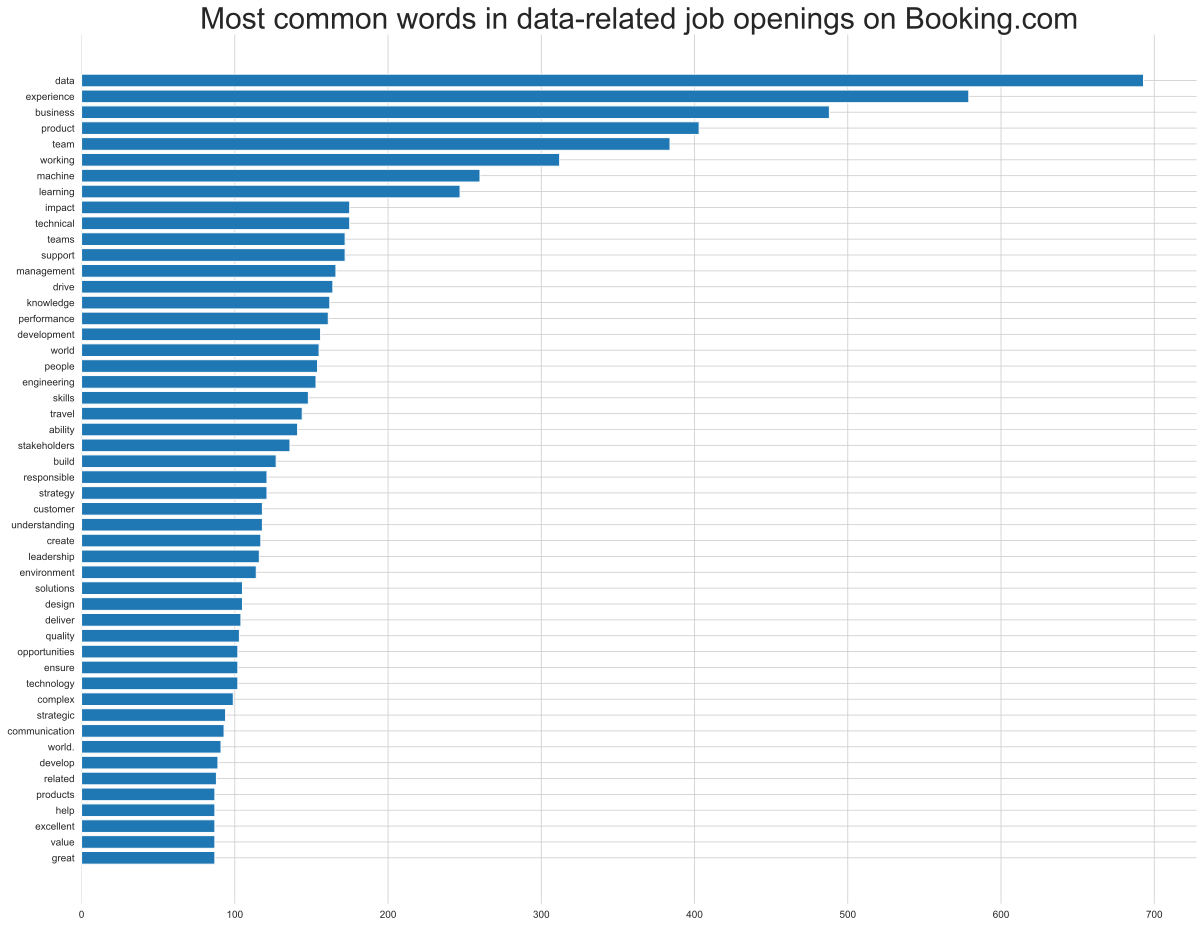

In [26]:
wordBarGraphFunction(df,'Job Description','Most common words in data-related job openings on Booking.com')